In [1]:
%load_ext autoreload
%autoreload 2
from FIFOv2 import FIFO 
from multi_latest import Multi
import matplotlib.pyplot as plt
import numpy as np
import math
from spcm import units
import spcm as spcm
import time as time
from time import sleep 
# import API classes into the current namespace
from pulsestreamer import PulseStreamer, Sequence 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Coself.samplesself.samplesect to Pulse Streamer
ip = '10.135.70.193' 
ps = PulseStreamer(ip)
Multi = Multi('dev/spcm0')


Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 10.135.70.193
Pulse Streamer 8/2 firmware: v1.5.2
Client software: v1.7.0
Your client software is more up to date than the Pulse Streamer 8/2 firmware. We recommend updating the firmware of your Pulse Streamer 8/2.
For detailed information visit https://www.swabianinstruments.com/pulse-streamer-8-2/downloads/ or contact support@swabianinstruments.com
Successfully connected to the digitizer


In [3]:
# To set the configuration, make a dictionary with the key and value
num_iters=12
config1={'num_samples' :None,
         'runs': 4,
         'readout_ch' :0,
         'num_pts_in_exp':2,
         'num_iters':num_iters}

In [4]:
# Assign_param takes the configuration and gives it to the class dictionary 

Multi.assign_param(settings_dict=config1)
Multi.config()

SETTINGS: card timeout =  20 s
SETTINGS: # segments =  512 Sa
SETTINGS: sampling freq =  0.5 GHz


In [5]:
probe_time = 50e3
readout_time = 1000
trig_time = 10


def CW_ODMR(num_freqs):
        
        '''
        CW ODMR Sequence
        Laser on for entire sequence. 
        MW on for probe_time.
        MW off for probe_time.
        User sets how many voltage samples (num_clocks) to take during each MW on/off window.
        '''
    
        def SingleCW_ODMR():
            
            # create sequence object
            seq_on = ps.createSequence()
            seq_off = ps.createSequence()

            # digitizer trigger timing
            clock_off1 = probe_time - 30*readout_time - trig_time
            clock_off2 = 30*readout_time

            iq_off = probe_time - trig_time

            # define sequence structure for clock and MW I/Q channels
            dig_clock_seq = [(clock_off1, 0), (trig_time, 1), (clock_off2, 0)]
            
            mw_iq_seq_on = [(trig_time, 1), (iq_off, 0)]
            mw_iq_seq_off = [(probe_time, 0)]

            # assign sequences to respective channels
            seq_on.setDigital(1, dig_clock_seq) # digitizer trigger
            seq_on.setDigital(2, mw_iq_seq_on) # MW IQ

            seq_off.setDigital(1, dig_clock_seq) # digitizer trigger
            seq_off.setDigital(2, mw_iq_seq_off) # MW IQ

            return seq_on + seq_off

        seqs = ps.createSequence()

        for i in range(num_freqs):
            seqs += SingleCW_ODMR()

        return seqs

In [8]:
ps_seq = CW_ODMR(1)

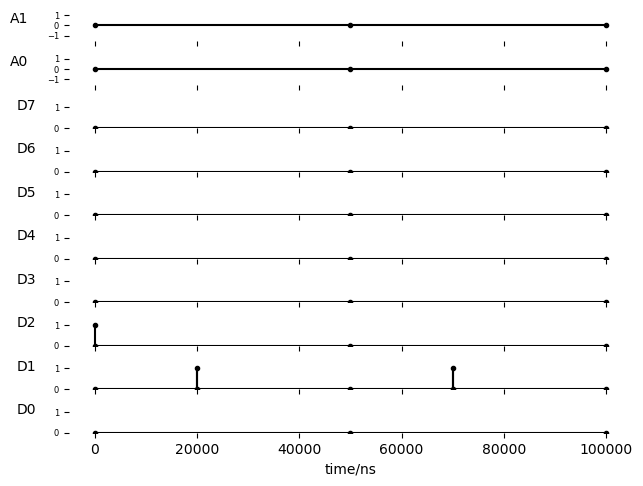

In [9]:
ps_seq.plot()

In [ ]:
Multi.config()
Multi.start_buffer()

DATA=Multi.acquire()

Multi.stop_card()
Multi.reset()

In [ ]:
plt.plot(np.ravel(Multi))